<a href="https://colab.research.google.com/github/adeliamnda/bali-review-sentiment-topic-modeling/blob/main/preprocessing-labeling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load data & preprocessing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
!pip install gdown
import gdown

file_id = "1T3PLuDjjT2ZE8BvXQmU97Rc9wHLrY6CZ"
url = f"https://drive.google.com/uc?id={file_id}"
output = "review_bali.csv"
gdown.download(url, output, quiet=False)
data = pd.read_csv("review_bali.csv")
data.head()

Downloading...
From: https://drive.google.com/uc?id=1T3PLuDjjT2ZE8BvXQmU97Rc9wHLrY6CZ
To: /content/review_bali.csv
100%|██████████| 1.18M/1.18M [00:00<00:00, 128MB/s]


,nama,waktu,rating,ulasan,foto_url
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...


In [ ]:
data = data.dropna()
print(data.isnull().sum())

nama        0
waktu       0
rating      0
ulasan      0
foto_url    0
dtype: int64


**Embedding**

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Ambil kolom teks
texts = data["ulasan"].astype(str).tolist()

# Load model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Generate embedding
embeddings = model.encode(texts)

# Simpan sebagai list dalam kolom baru
data["embedding_text"] = embeddings.tolist()

print(data.head())


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                  nama                 waktu     rating  \
0                KPLeo         seminggu lalu  5 bintang   
1             Arif Rey           6 hari lalu  5 bintang   
2       Ayrton Moniung          sebulan lalu  5 bintang   
3       ZIZAN Bli Jawa          2 bulan lalu  5 bintang   
4  Gunawan Satyakusuma  Diedit seminggu lalu  5 bintang   

                                              ulasan  \
0  Awalnya hanya ingin mengetahui proses pembuata...   
1  Seru banget ke Alas Harum Bali! Tempatnya cake...   
2  Defenisi alam bener2 menyatu dengan alam disin...   
3  🤩😎Tempatnya luar biasa! Pemandangan sawah tera...   
4  Pengalaman di Alas Arum Ubud sangat menyenangk...   

                                            foto_url  \
0  https://lh3.googleusercontent.com/geougc-cs/AM...   
1  https://lh3.googleusercontent.com/geougc-cs/AM...   
2  https://lh3.googleusercontent.com/geougc-cs/AM...   
3  https://lh3.googleusercontent.com/geougc-cs/AM...   
4  https://lh3.googleusercon

In [ ]:
print(data.head())

                  nama                 waktu     rating  \
0                KPLeo         seminggu lalu  5 bintang   
1             Arif Rey           6 hari lalu  5 bintang   
2       Ayrton Moniung          sebulan lalu  5 bintang   
3       ZIZAN Bli Jawa          2 bulan lalu  5 bintang   
4  Gunawan Satyakusuma  Diedit seminggu lalu  5 bintang   

                                              ulasan  \
0  Awalnya hanya ingin mengetahui proses pembuata...   
1  Seru banget ke Alas Harum Bali! Tempatnya cake...   
2  Defenisi alam bener2 menyatu dengan alam disin...   
3  🤩😎Tempatnya luar biasa! Pemandangan sawah tera...   
4  Pengalaman di Alas Arum Ubud sangat menyenangk...   

                                            foto_url  \
0  https://lh3.googleusercontent.com/geougc-cs/AM...   
1  https://lh3.googleusercontent.com/geougc-cs/AM...   
2  https://lh3.googleusercontent.com/geougc-cs/AM...   
3  https://lh3.googleusercontent.com/geougc-cs/AM...   
4  https://lh3.googleusercon

In [ ]:
# --------------------------------------
# 1. Import Library
# --------------------------------------
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import torch
import pandas as pd
import requests
from io import BytesIO
import numpy as np
from tqdm import tqdm

# --------------------------------------
# 3. Load Model & Processor
# --------------------------------------
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

# --------------------------------------
# 4. Fungsi untuk dapatkan embedding gambar
# --------------------------------------
def get_image_embedding_from_url(url):
    try:
        # Ambil gambar dari URL
        response = requests.get(url, timeout=10)
        image = Image.open(BytesIO(response.content)).convert("RGB")

        # Preprocessing gambar
        inputs = processor(images=image, return_tensors="pt")

        # Dapatkan output dari model
        with torch.no_grad():
            outputs = model(**inputs)

        # Ambil [CLS] token embedding (biasanya di index 0)
        embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        return embedding

    except Exception as e:
        print(f"Error pada {url}: {e}")
        return np.zeros(model.config.hidden_size)

# --------------------------------------
# 5. Generate Embedding untuk semua gambar
# --------------------------------------
image_embeddings = []

for url in tqdm(data["foto_url"].tolist(), desc="Processing images"):
    emb = get_image_embedding_from_url(url)
    image_embeddings.append(emb)

image_embeddings = np.array(image_embeddings)
print("Shape image embedding:", image_embeddings.shape)

# --------------------------------------
# 7. Tambahkan ke dataframe
# --------------------------------------
data["image_embedding"] = image_embeddings.tolist()
print(data.head())

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing images: 100%|██████████| 2736/2736 [52:14<00:00,  1.15s/it]


Shape image embedding: (2736, 768)
                  nama                 waktu     rating  \
0                KPLeo         seminggu lalu  5 bintang   
1             Arif Rey           6 hari lalu  5 bintang   
2       Ayrton Moniung          sebulan lalu  5 bintang   
3       ZIZAN Bli Jawa          2 bulan lalu  5 bintang   
4  Gunawan Satyakusuma  Diedit seminggu lalu  5 bintang   

                                              ulasan  \
0  Awalnya hanya ingin mengetahui proses pembuata...   
1  Seru banget ke Alas Harum Bali! Tempatnya cake...   
2  Defenisi alam bener2 menyatu dengan alam disin...   
3  🤩😎Tempatnya luar biasa! Pemandangan sawah tera...   
4  Pengalaman di Alas Arum Ubud sangat menyenangk...   

                                            foto_url  \
0  https://lh3.googleusercontent.com/geougc-cs/AM...   
1  https://lh3.googleusercontent.com/geougc-cs/AM...   
2  https://lh3.googleusercontent.com/geougc-cs/AM...   
3  https://lh3.googleusercontent.com/geougc-cs/AM

In [ ]:
df = pd.read_pickle("data_with_embeddings.pkl")
df.head()

,nama,waktu,rating,ulasan,foto_url,embedding_text,image_embedding
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.07014128565788269, 0.08082333207130432, 0....","[-0.49789124727249146, 0.46836838126182556, 0...."
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[0.03832599148154259, 0.10533391684293747, -0....","[0.2677088975906372, 0.11979099363088608, 2.77..."
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.05757254734635353, 0.10350858420133591, -0...","[-0.5911501049995422, 1.623487949371338, 1.733..."
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.059108998626470566, 0.09825514256954193, -...","[0.6459438800811768, -0.8255026340484619, -2.0..."
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[0.047442205250263214, 0.11480876058340073, -0...","[-1.035332441329956, 1.1647416353225708, 2.032..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

# Contoh variabel
# text_embeddings, image_embeddings, multimodal_embeddings

# Simpan ke folder tertentu di Google Drive
np.save("/content/drive/MyDrive/FP SML/text_embeddings.npy", embedding_text)
np.save("/content/drive/MyDrive/FP SML/image_embeddings.npy", image_embeddings)

print("✅ Semua file embeddings tersimpan di Google Drive!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Semua file embeddings tersimpan di Google Drive!


In [ ]:
import pandas as pd
import numpy as np
!pip install gdown
import gdown

file_id = "1slEkvOUUukFw4qeZWIoKym69FwpnJmEn"
url = f"https://drive.google.com/uc?id={file_id}"
output = "review.csv"
gdown.download(url, output, quiet=False)
df = pd.read_csv("review.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1slEkvOUUukFw4qeZWIoKym69FwpnJmEn
To: /content/review.csv
100%|██████████| 67.7M/67.7M [00:00<00:00, 152MB/s]


,nama,waktu,rating,ulasan,foto_url,embedding_text,image_embedding
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.07014128565788269, 0.08082333207130432, 0....","[-0.49789124727249146, 0.46836838126182556, 0...."
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[0.03832599148154259, 0.10533391684293747, -0....","[0.2677088975906372, 0.11979099363088608, 2.77..."
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.05757254734635353, 0.10350858420133591, -0...","[-0.5911501049995422, 1.623487949371338, 1.733..."
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.059108998626470566, 0.09825514256954193, -...","[0.6459438800811768, -0.8255026340484619, -2.0..."
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[0.047442205250263214, 0.11480876058340073, -0...","[-1.035332441329956, 1.1647416353225708, 2.032..."


In [ ]:
embedding_text = np.array(embedding_text)
image_embeddings = np.array(image_embeddings)

print("Text embedding shape:", embedding_text.shape)
print("Image embedding shape:", image_embeddings.shape)

Text embedding shape: (2736,)
Image embedding shape: (2736, 768)


In [ ]:
data.head()

,nama,waktu,rating,ulasan,foto_url,embedding_text,image_embedding
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.07014128565788269, 0.08082333207130432, 0....","[-0.49789124727249146, 0.46836838126182556, 0...."
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[0.03832599148154259, 0.10533391684293747, -0....","[0.2677088975906372, 0.11979099363088608, 2.77..."
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.05757254734635353, 0.10350858420133591, -0...","[-0.5911501049995422, 1.623487949371338, 1.733..."
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[-0.059108998626470566, 0.09825514256954193, -...","[0.6459438800811768, -0.8255026340484619, -2.0..."
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,"[0.047442205250263214, 0.11480876058340073, -0...","[-1.035332441329956, 1.1647416353225708, 2.032..."


In [ ]:
import numpy as np

text_embeddings = np.load("/content/drive/MyDrive/FP SML/text_embeddings.npy", allow_pickle=True)       # shape (n, 384)
image_embeddings = np.load("/content/drive/MyDrive/FP SML/image_embeddings.npy", allow_pickle=True)   # shape (n, 768)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(text_embeddings[:5])
print(image_embeddings[:5])

[list([-0.07014128565788269, 0.08082333207130432, 0.012292090803384781, 0.021109918132424355, -0.0739956647157669, -0.015612526796758175, 0.039632197469472885, 0.03610686957836151, -0.020328344777226448, -0.003459462197497487, 0.10087119042873383, -0.016051005572080612, -0.007677403744310141, -0.05689508467912674, 0.0763704851269722, -0.010663250461220741, -0.0412461943924427, 0.047035735100507736, -0.07552698254585266, -0.07085274904966354, -0.004333144519478083, -0.05537378415465355, -0.021589256823062897, 0.03515486419200897, -0.07072734087705612, -0.0426114946603775, 0.0711401104927063, 0.02420111931860447, 0.04618726298213005, 0.02529444731771946, 0.0057084751315414906, 0.0975683256983757, 0.06273450702428818, 0.00975843332707882, -0.03630717098712921, 0.06656650453805923, -0.04494902864098549, -0.05604057386517525, 0.025144491344690323, 0.04576931148767471, 0.017387354746460915, -0.10607089847326279, -0.01749870739877224, -0.1114121600985527, 0.11457278579473495, -0.0298092607408

In [ ]:
print("Data shape:", data.shape)
print("Embeddings shape:", text_embeddings.shape)

Data shape: (2736, 5)
Embeddings shape: (2736,)


In [ ]:
# pastikan semua embedding jadi numpy array numerik
text_embeddings = np.array(text_embeddings.tolist() if isinstance(text_embeddings, np.ndarray) else text_embeddings)
image_embeddings = np.array(image_embeddings.tolist() if isinstance(image_embeddings, np.ndarray) else image_embeddings)

print("Text dtype:", text_embeddings.dtype)
print("Image dtype:", image_embeddings.dtype)

# sekarang normalisasi akan aman
text_norm = text_embeddings / np.linalg.norm(text_embeddings, axis=1, keepdims=True)
image_norm = image_embeddings / np.linalg.norm(image_embeddings, axis=1, keepdims=True)

# lalu gabungkan
multimodal_embeddings = np.concatenate([text_norm, image_norm], axis=1)
print("✅ Multimodal embedding shape:", multimodal_embeddings.shape)

Text dtype: float64
Image dtype: float64
✅ Multimodal embedding shape: (2736, 1152)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

# Contoh variabel
# text_embeddings, image_embeddings, multimodal_embeddings

# Simpan ke folder tertentu di Google Drive
np.save("/content/drive/MyDrive/FP SML/multimodal_embeddings.npy", multimodal_embeddings)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Rating Label**




In [ ]:
# --- (1) Ekstrak angka dari teks rating ---
# Contoh: "5 bintang" -> 5
data["rating_num"] = data["rating"].str.extract(r'(\d+)').astype(float)

# --- (2) Tentukan label sentimen ---
conditions = [
    data["rating_num"].isin([1, 2]),
    data["rating_num"] == 3,
    data["rating_num"].isin([4, 5])
]
choices = ["negative", "neutral", "positive"]

data["rating_label"] = np.select(conditions, choices, default="unknown")

# --- (3) Cek hasil ---
print(data[["rating", "rating_num", "rating_label"]].head())


      rating  rating_num rating_label
0  5 bintang         5.0     positive
1  5 bintang         5.0     positive
2  5 bintang         5.0     positive
3  5 bintang         5.0     positive
4  5 bintang         5.0     positive


rating_label
positive    2646
neutral       54
negative      36
Name: count, dtype: int64


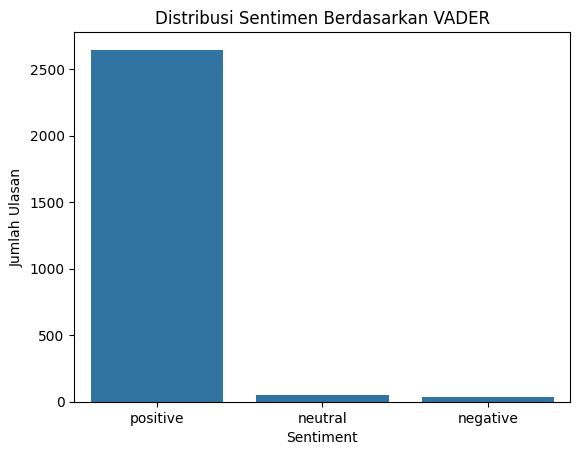

In [ ]:
print(data["rating_label"].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="rating_label", data=data, order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen Berdasarkan Rating Label")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Ulasan")
plt.show()

### **Translate**

In [ ]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator
import pandas as pd

# misal data kamu
# data = pd.read_csv("review_bali.csv")

# terjemahkan kolom "ulasan" dari Indonesia → Inggris
def translate_to_en(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return ""

data["ulasan_en"] = data["ulasan"].astype(str).apply(translate_to_en)
print(data[["ulasan", "ulasan_en"]].head())

                                              ulasan  \
0  Awalnya hanya ingin mengetahui proses pembuata...   
1  Seru banget ke Alas Harum Bali! Tempatnya cake...   
2  Defenisi alam bener2 menyatu dengan alam disin...   
3  🤩😎Tempatnya luar biasa! Pemandangan sawah tera...   
4  Pengalaman di Alas Arum Ubud sangat menyenangk...   

                                           ulasan_en  
0  Initially, I just wanted to know the process o...  
1  It's really exciting to go to Alas Harum Bali!...  
2  The definition of nature is truly one with nat...  
3  🤩😎The place is amazing! The view of the green ...  
4  The experience at Alas Arum Ubud was very plea...  


In [ ]:
data.head()

,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o..."
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...


### **Vader Label**

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

# Pastikan kolom ulasan berupa teks
data["ulasan_en"] = data["ulasan_en"].astype(str)

# Fungsi untuk analisis VADER
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

# Terapkan ke seluruh kolom
data["vader_score"] = data["ulasan_en"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
data["vader_label"] = data["ulasan_en"].apply(get_vader_sentiment)

print("✅ Analisis selesai!")
print(data.head())

✅ Analisis selesai!
                  nama                 waktu     rating  \
0                KPLeo         seminggu lalu  5 bintang   
1             Arif Rey           6 hari lalu  5 bintang   
2       Ayrton Moniung          sebulan lalu  5 bintang   
3       ZIZAN Bli Jawa          2 bulan lalu  5 bintang   
4  Gunawan Satyakusuma  Diedit seminggu lalu  5 bintang   

                                              ulasan  \
0  Awalnya hanya ingin mengetahui proses pembuata...   
1  Seru banget ke Alas Harum Bali! Tempatnya cake...   
2  Defenisi alam bener2 menyatu dengan alam disin...   
3  🤩😎Tempatnya luar biasa! Pemandangan sawah tera...   
4  Pengalaman di Alas Arum Ubud sangat menyenangk...   

                                            foto_url  rating_num rating_label  \
0  https://lh3.googleusercontent.com/geougc-cs/AM...         5.0     positive   
1  https://lh3.googleusercontent.com/geougc-cs/AM...         5.0     positive   
2  https://lh3.googleusercontent.com/geougc-c

In [ ]:
data.head()

,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive


vader_label
positive    2341
neutral      214
negative     181
Name: count, dtype: int64


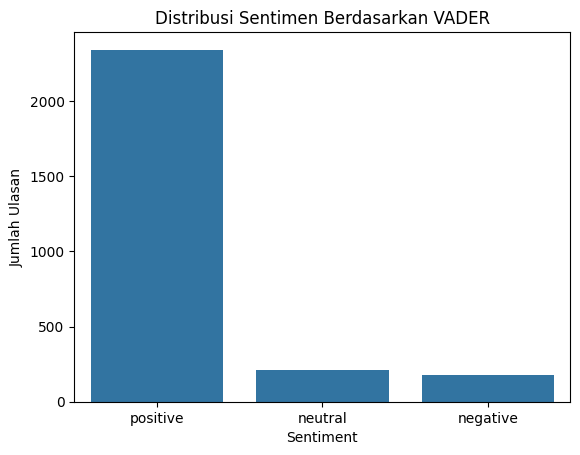

In [ ]:
print(data["vader_label"].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="vader_label", data=data, order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen Berdasarkan VADER")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Ulasan")
plt.show()

### **Text Blob**

In [ ]:
from textblob import TextBlob

def textblob_label(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0.05:
        return "positive"
    elif score < -0.05:
        return "negative"
    else:
        return "neutral"

data["textblob_label"] = data["ulasan_en"].apply(textblob_label)

In [ ]:
data.head()

,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label,textblob_label
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral,positive
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive,positive
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive,positive


textblob_label
positive    2345
neutral      263
negative     128
Name: count, dtype: int64


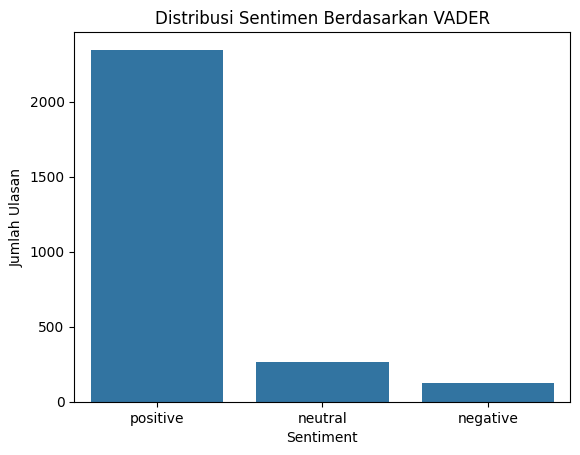

In [ ]:
print(data["textblob_label"].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="textblob_label", data=data, order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen Berdasarkan Textblob")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Ulasan")
plt.show()

### **Actual Label**

In [ ]:
import pandas as pd

def majority_label(row):
    labels = [row["rating_label"], row["vader_label"], row["textblob_label"]]
    unique_labels = set(labels)

    # Jika semua label sama → ambil salah satunya
    if len(unique_labels) == 1:
        return labels[0]

    # Hitung kemunculan tiap label
    counts = pd.Series(labels).value_counts()
    top_label = counts.idxmax()

    # Jika ada 3 label berbeda → netral
    if len(unique_labels) == 3:
        return "neutral"

    # Kalau tidak, ambil label yang paling sering muncul
    return top_label

# Terapkan ke DataFrame
data["label_aktual"] = data.apply(majority_label, axis=1)

print(data[["rating_label", "vader_label", "textblob_label", "label_aktual"]].head())

  rating_label vader_label textblob_label label_aktual
0     positive     neutral       positive     positive
1     positive    positive       positive     positive
2     positive    positive       positive     positive
3     positive    positive       positive     positive
4     positive    positive       positive     positive


label_aktual
positive    2501
neutral      167
negative      68
Name: count, dtype: int64


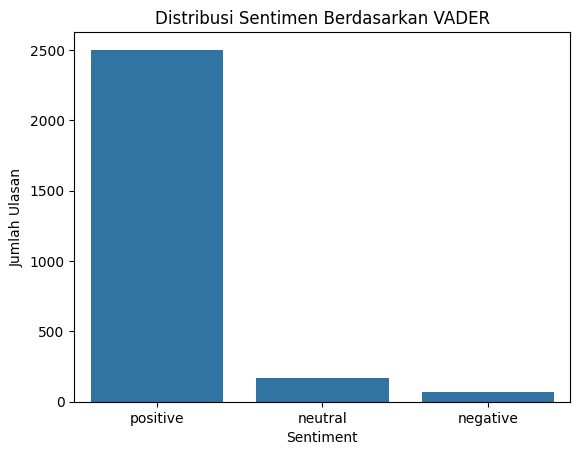

In [ ]:
print(data["label_aktual"].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label_aktual", data=data, order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen Berdasarkan VADER")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Ulasan")
plt.show()

In [ ]:
data.head(10)

,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label,textblob_label,label_aktual
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral,positive,positive
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive,positive,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive,positive,positive
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive,positive,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive,positive,positive
5,Yusuf Pakes,seminggu lalu,5 bintang,Tempat yang sangat nyaman buat wisata alam\n\n...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,A very comfortable place for natural tourism\n...,0.9061,positive,positive,positive
6,Fransisca Tris Kusumaningsih,Diedit 5 bulan lalu,5 bintang,Paduan wisata alam dan buatan yang sangat ind...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,A very beautiful combination of natural and ar...,0.9245,positive,positive,positive
7,haikhal piliang,4 minggu lalu,5 bintang,"Tempat nongkrong yg terasa asli, alami dan men...",https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"A place to hang out that feels authentic, natu...",0.4215,positive,positive,positive
8,Arum Shadewi,4 bulan lalu,5 bintang,"Bagusssss, cocoknya buat cewe2 ya, karena spot...",https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"It's good, it's suitable for girls, because it...",0.8934,positive,positive,positive
9,Ririt RB,6 bulan lalu,5 bintang,Satu lagi tempat cantik di Bali yang banyak sp...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,Another beautiful place in Bali with lots of s...,0.8779,positive,positive,positive


In [ ]:
import pandas as pd

# ganti nama dan path sesuai kebutuhan
save_path = "/content/drive/MyDrive/FP SML/hasil_label_sentimen.csv"

# simpan ke CSV
data.to_csv(save_path, index=False, encoding="utf-8")

print(f"✅ File berhasil disimpan ke Google Drive:\n{save_path}")

✅ File berhasil disimpan ke Google Drive:
/content/drive/MyDrive/FP SML/hasil_label_sentimen.csv


**Data Label Aktual (sementara)**

In [ ]:
import pandas as pd
import numpy as np
!pip install gdown
import gdown

file_id = "1T4NKsxemv1QxpuDjZI84qyzH0rWKyfes"
url = f"https://drive.google.com/uc?id={file_id}"
output = "hasil_label_sentimen.csv"
gdown.download(url, output, quiet=False)
datalabel = pd.read_csv("hasil_label_sentimen.csv")
datalabel.head()

Downloading...
From: https://drive.google.com/uc?id=1T4NKsxemv1QxpuDjZI84qyzH0rWKyfes
To: /content/hasil_label_sentimen.csv
100%|██████████| 1.82M/1.82M [00:00<00:00, 19.8MB/s]


,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label,textblob_label,label_aktual
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral,positive,positive
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive,positive,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive,positive,positive
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive,positive,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive,positive,positive


### **Labeling Afinn**

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=4af33e4a0af5c461077095b23cc658d131d61d4a203a012e85d8efaeba2a80a9
  Stored in directory: /root/.cache/pip/wheels/f9/72/27/74994e77200dae3d6aea2b546264500cee21f738c51241320b
Successfully built afinn


In [ ]:
from afinn import Afinn
import pandas as pd

# inisialisasi AFINN analyzer
afn = Afinn()

In [ ]:
def afinn_sentiment_label(text):
    try:
        score = afn.score(str(text))
        if score > 0:
            label = "positive"
        elif score < 0:
            label = "negative"
        else:
            label = "neutral"
        return pd.Series({"afinn_score": score, "afinn_label": label})
    except:
        return pd.Series({"afinn_score": 0, "afinn_label": "neutral"})

In [ ]:
datalabel[["afinn_score", "afinn_label"]] = datalabel["ulasan_en"].astype(str).apply(afinn_sentiment_label)

print("✅ Labeling selesai!")
print(datalabel[["ulasan_en", "afinn_score", "afinn_label"]].head())

✅ Labeling selesai!
                                           ulasan_en  afinn_score afinn_label
0  Initially, I just wanted to know the process o...          4.0    positive
1  It's really exciting to go to Alas Harum Bali!...          4.0    positive
2  The definition of nature is truly one with nat...          0.0     neutral
3  🤩😎The place is amazing! The view of the green ...         13.0    positive
4  The experience at Alas Arum Ubud was very plea...          7.0    positive


In [ ]:
datalabel.head()

,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label,textblob_label,label_aktual,afinn_score,afinn_label
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral,positive,positive,4.0,positive
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive,positive,positive,4.0,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive,positive,positive,0.0,neutral
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive,positive,positive,13.0,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive,positive,positive,7.0,positive


afinn_label
positive    2327
neutral      267
negative     142
Name: count, dtype: int64


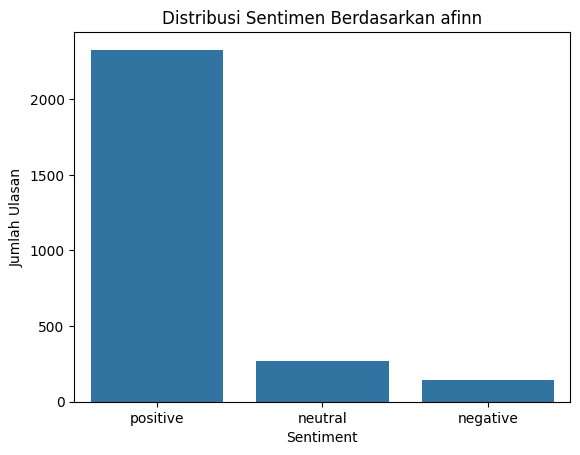

In [ ]:
print(datalabel["afinn_label"].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="afinn_label", data=datalabel, order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen Berdasarkan afinn")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Ulasan")
plt.show()

In [ ]:
datalabel = datalabel.drop(columns=["label_aktual"])
datalabel.head()

,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label,textblob_label,afinn_score,afinn_label
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral,positive,4.0,positive
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive,positive,4.0,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive,positive,0.0,neutral
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive,positive,13.0,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive,positive,7.0,positive


### **Bentuk Label Aktual**
vader, textblob, afinn

In [ ]:
import pandas as pd

def majority_label(row):
    labels = [row["vader_label"], row["textblob_label"], row["afinn_label"]]
    unique_labels = set(labels)

    # Jika semua label sama → ambil salah satunya
    if len(unique_labels) == 1:
        return labels[0]

    # Hitung kemunculan tiap label
    counts = pd.Series(labels).value_counts()
    top_label = counts.idxmax()

    # Jika ada 3 label berbeda → netral
    if len(unique_labels) == 3:
        return "neutral"

    # Kalau tidak, ambil label yang paling sering muncul
    return top_label

# Terapkan ke DataFrame
datalabel["label_aktual"] = datalabel.apply(majority_label, axis=1)

datalabel[["rating_label", "vader_label", "textblob_label", "label_aktual"]].head()

,rating_label,vader_label,textblob_label,label_aktual
0,positive,neutral,positive,positive
1,positive,positive,positive,positive
2,positive,positive,positive,positive
3,positive,positive,positive,positive
4,positive,positive,positive,positive


In [ ]:
import pandas as pd

# ganti nama dan path sesuai kebutuhan
save_path = "/content/drive/MyDrive/Colab Notebooks/SML/data_label.csv"

# simpan ke CSV
datalabel.to_csv(save_path, index=False, encoding="utf-8")

print(f"✅ File berhasil disimpan ke Google Drive:\n{save_path}")

✅ File berhasil disimpan ke Google Drive:
/content/drive/MyDrive/Colab Notebooks/SML/data_label.csv


### **Panggil Data Label Aktual 3 methods**

In [ ]:
import pandas as pd
import numpy as np
!pip install gdown
import gdown

file_id = "13oy1pH836mylOn5h6Itp3nGvFc51D64i"
url = f"https://drive.google.com/uc?id={file_id}"
output = "label_fix.csv"
gdown.download(url, output, quiet=False)
datalabelfix = pd.read_csv("label_fix.csv")
datalabelfix.head()

Downloading...
From: https://drive.google.com/uc?id=13oy1pH836mylOn5h6Itp3nGvFc51D64i
To: /content/label_fix.csv
100%|██████████| 1.86M/1.86M [00:00<00:00, 67.9MB/s]


,nama,waktu,rating,ulasan,foto_url,rating_num,rating_label,ulasan_en,vader_score,vader_label,textblob_label,afinn_score,afinn_label,label_aktual
0,KPLeo,seminggu lalu,5 bintang,Awalnya hanya ingin mengetahui proses pembuata...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,"Initially, I just wanted to know the process o...",-0.0495,neutral,positive,4.0,positive,positive
1,Arif Rey,6 hari lalu,5 bintang,Seru banget ke Alas Harum Bali! Tempatnya cake...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,It's really exciting to go to Alas Harum Bali!...,0.8035,positive,positive,4.0,positive,positive
2,Ayrton Moniung,sebulan lalu,5 bintang,Defenisi alam bener2 menyatu dengan alam disin...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The definition of nature is truly one with nat...,0.7742,positive,positive,0.0,neutral,positive
3,ZIZAN Bli Jawa,2 bulan lalu,5 bintang,🤩😎Tempatnya luar biasa! Pemandangan sawah tera...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,🤩😎The place is amazing! The view of the green ...,0.9483,positive,positive,13.0,positive,positive
4,Gunawan Satyakusuma,Diedit seminggu lalu,5 bintang,Pengalaman di Alas Arum Ubud sangat menyenangk...,https://lh3.googleusercontent.com/geougc-cs/AM...,5.0,positive,The experience at Alas Arum Ubud was very plea...,0.8977,positive,positive,7.0,positive,positive


label_aktual
positive    2371
neutral      250
negative     115
Name: count, dtype: int64


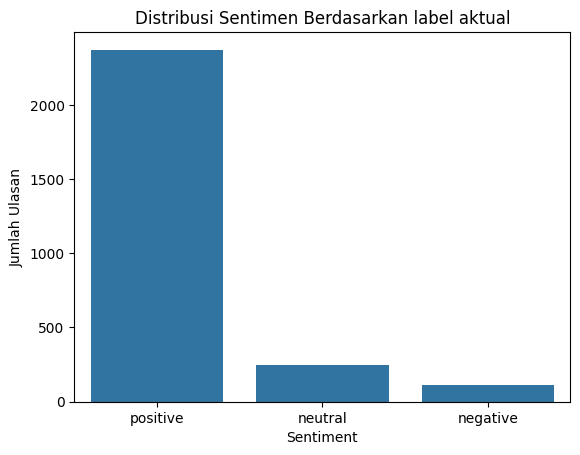

In [ ]:
print(datalabelfix["label_aktual"].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label_aktual", data=datalabelfix, order=["positive", "neutral", "negative"])
plt.title("Distribusi Sentimen Berdasarkan label aktual")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah Ulasan")
plt.show()

### **Panggil Data embedding text, image, multimodal**

In [ ]:
file_id_text = "1XgJGrLUhwQWrz6yV4N-GS1XufGcE11y8"        # 🔁 Ganti ID dengan ID file kamu
file_id_image = "1nwQpap8dVugKC7ptj7e-4RK3UjyoSAP3"
file_id_mult = "1wmLmZR8xDed_gBHAy5FxYBtuBCb9MgN_"

url_text = f"https://drive.google.com/uc?id={file_id_text}"
url_image = f"https://drive.google.com/uc?id={file_id_image}"
url_mult = f"https://drive.google.com/uc?id={file_id_mult}"

gdown.download(url_text, "text_embeddings.npy", quiet=False)
gdown.download(url_image, "image_embeddings.npy", quiet=False)
gdown.download(url_mult, "multimodal_embeddings.npy", quiet=False)

text_embeddings = np.load("text_embeddings.npy", allow_pickle=True)
image_embeddings = np.load("image_embeddings.npy", allow_pickle=True)
multimodal_embeddings = np.load("multimodal_embeddings.npy", allow_pickle=True)

print("text_embeddings:", np.array(text_embeddings).shape)
print("image_embeddings:", np.array(image_embeddings).shape)
print("multimodal_embeddings:", np.array(multimodal_embeddings).shape)

Downloading...
From: https://drive.google.com/uc?id=1XgJGrLUhwQWrz6yV4N-GS1XufGcE11y8
To: /content/text_embeddings.npy
100%|██████████| 9.47M/9.47M [00:00<00:00, 68.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nwQpap8dVugKC7ptj7e-4RK3UjyoSAP3
To: /content/image_embeddings.npy
100%|██████████| 8.41M/8.41M [00:00<00:00, 21.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wmLmZR8xDed_gBHAy5FxYBtuBCb9MgN_
To: /content/multimodal_embeddings.npy
100%|██████████| 25.2M/25.2M [00:00<00:00, 141MB/s] 


text_embeddings: (2736,)
image_embeddings: (2736, 768)
multimodal_embeddings: (2736, 1152)
